# Outliers detection

Try to detect whether a new observation belongs to the same distribution as existing observations (it is an inlier), or should be considered as different (it is an outlier). The methods are used for anomaly detection.

Source for inspiration:
- https://scikit-learn.org/stable/modules/outlier_detection.html
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
- https://scikit-learn.org/stable/auto_examples/plot_anomaly_comparison.html
- https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/
- https://github.com/SharmaNatasha/Machine-Learning-using-Python/blob/master/Simple%20projects/Detecting_Removing_Outliers.ipynb
- https://archive.ics.uci.edu/ml/

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn import svm

import time

np.random.seed(42)

In [8]:
# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)

# Connect together
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Connect together
X_train = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X_train), dtype=int)
# outlier is marked as -1, else 1
ground_truth[-n_outliers:] = -1

In [9]:
# The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method
# which computes the local density deviation of a given data point with respect to its neighbors. 
# It considers as outliers the samples that have a substantially lower density than their neighbors.
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X_train)

n_errors = (y_pred != ground_truth).sum()
X_scores = lof.negative_outlier_factor_

print ('n_errors:', n_errors)

y_pred

n_errors: 8


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

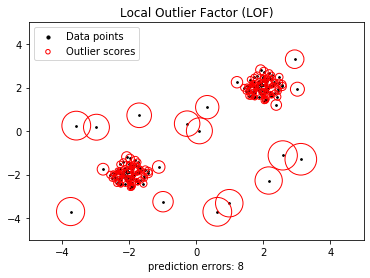

In [10]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X_train[:, 0], X_train[:, 1], color='k', s=3., label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.scatter(X_train[:, 0], X_train[:, 1], s=1000 * radius, edgecolors='r', facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [19]:
# Try to detect some outliers in Boston house pricing dataset
from sklearn.datasets import load_boston

dataset_boston = load_boston()
# print(dataset_boston.keys())

#Description of dataset
print(dataset_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston_df = pd.DataFrame(dataset_boston.data)
boston_df.columns = dataset_boston.feature_names
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


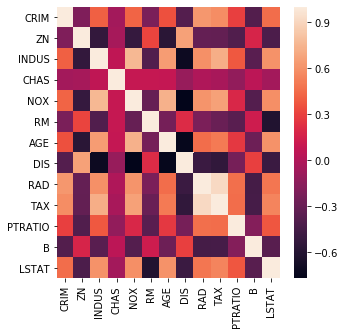

In [13]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(boston_df.corr())

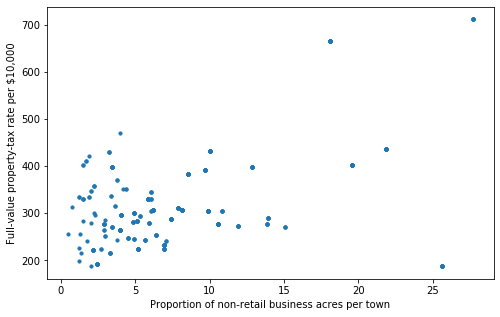

In [21]:
# Multivariate outlier analysis for:
# INDUS ... proportion of non-retail business acres per town
# TAX ... full-value property-tax rate per $10,000

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(boston_df['INDUS'], boston_df['TAX'], s=10)
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [30]:
X_train_boston = np.asarray(boston_df[['INDUS', 'TAX']])
X_train_boston

array([[  2.31, 296.  ],
       [  7.07, 242.  ],
       [  7.07, 242.  ],
       ...,
       [ 11.93, 273.  ],
       [ 11.93, 273.  ],
       [ 11.93, 273.  ]])

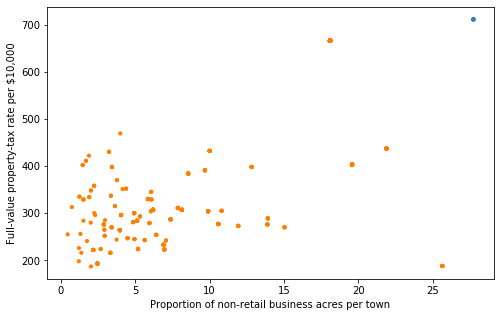

In [61]:
lof_boston = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred_boston = lof_boston.fit_predict(X_train_boston)

colors = np.array(['#377eb8', '#ff7f00'])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X_train_boston[:, 0], X_train_boston[:, 1], s=10, color=colors[(y_pred_boston + 1) // 2])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

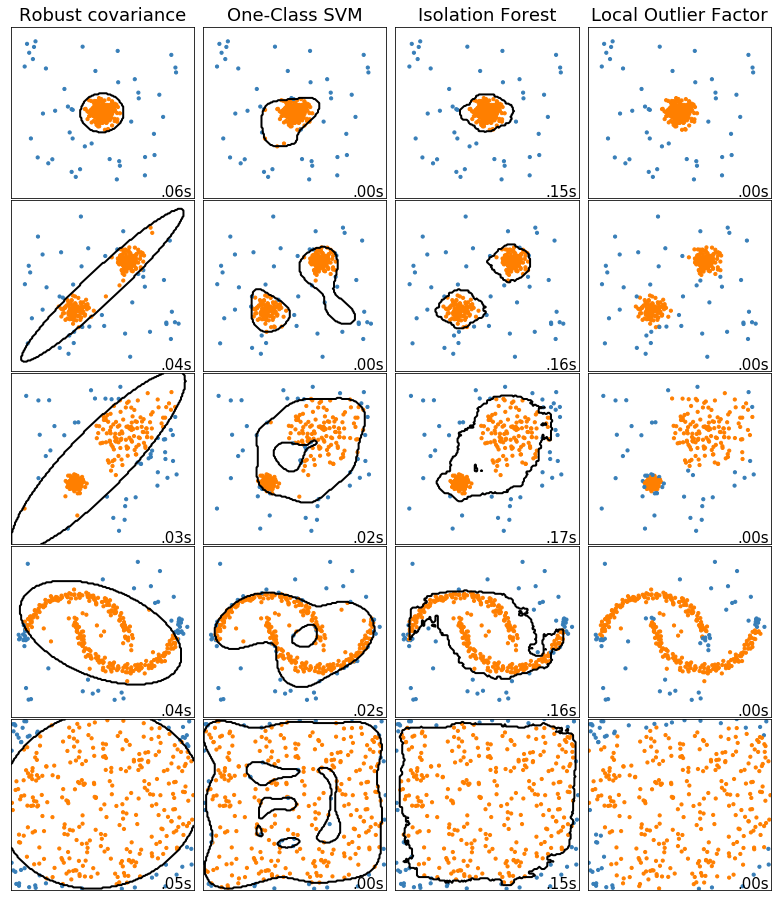

In [62]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Albert Thomas <albert.thomas@telecom-paristech.fr>
# License: BSD 3 clause

from sklearn.datasets import make_moons, make_blobs

# Example settings
n_samples = 300
# For each dataset, 15% of samples are generated as random uniform noise. 
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
# contamination : float in (0., 0.5), optional (default=0.1) 
#    - The amount of contamination of the data set, i.e. the proportion of outliers in the data set.
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)), # assumes the data is Gaussian and learns an ellipse
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction, random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction))]

colors = np.array(['#377eb8', '#ff7f00'])

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] - np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

# ensemble.IsolationForest and neighbors.LocalOutlierFactor perform reasonably well on the data sets considered here